In [ ]:
import pandas as pd

# Replace 'example.csv' with the actual name of your CSV file
df = pd.read_csv('/content/StudentsPerformance.csv')


In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
print (df.shape)

(1000, 8)


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
#import all related libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import numpy as np
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [ ]:
#Analyze the data
#check if missing data
print("data size: ", df.shape)
print(df.dtypes)
# df.info()
for col in df.columns:
    miss_rate = np.mean(df[col].isnull())
    print("{} null rate is {}%".format(col, round(miss_rate)*100))
    if not is_numeric_dtype(df[col]):
        print(f"value counts in {col} column are below {df[col].unique()}")

data size:  (1000, 8)
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object
gender null rate is 0%
value counts in gender column are below ['female' 'male']
race/ethnicity null rate is 0%
value counts in race/ethnicity column are below ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education null rate is 0%
value counts in parental level of education column are below ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch null rate is 0%
value counts in lunch column are below ['standard' 'free/reduced']
test preparation course null rate is 0%
value counts in test preparation course column are below ['none' 'completed']
math score null rate is 0%

In [ ]:
#Rename column
df.rename(columns = {"race/ethnicity": "ethnicity", "parental level of education": "parental_education"}, inplace=True)
df.columns

Index(['gender', 'ethnicity', 'parental_education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
df.groupby(['gender', 'parental_education'])['math score'].mean().round(2)["female"]
len(df['parental_education'].unique())

6

<ipython-input-19-064847454d80>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,j)


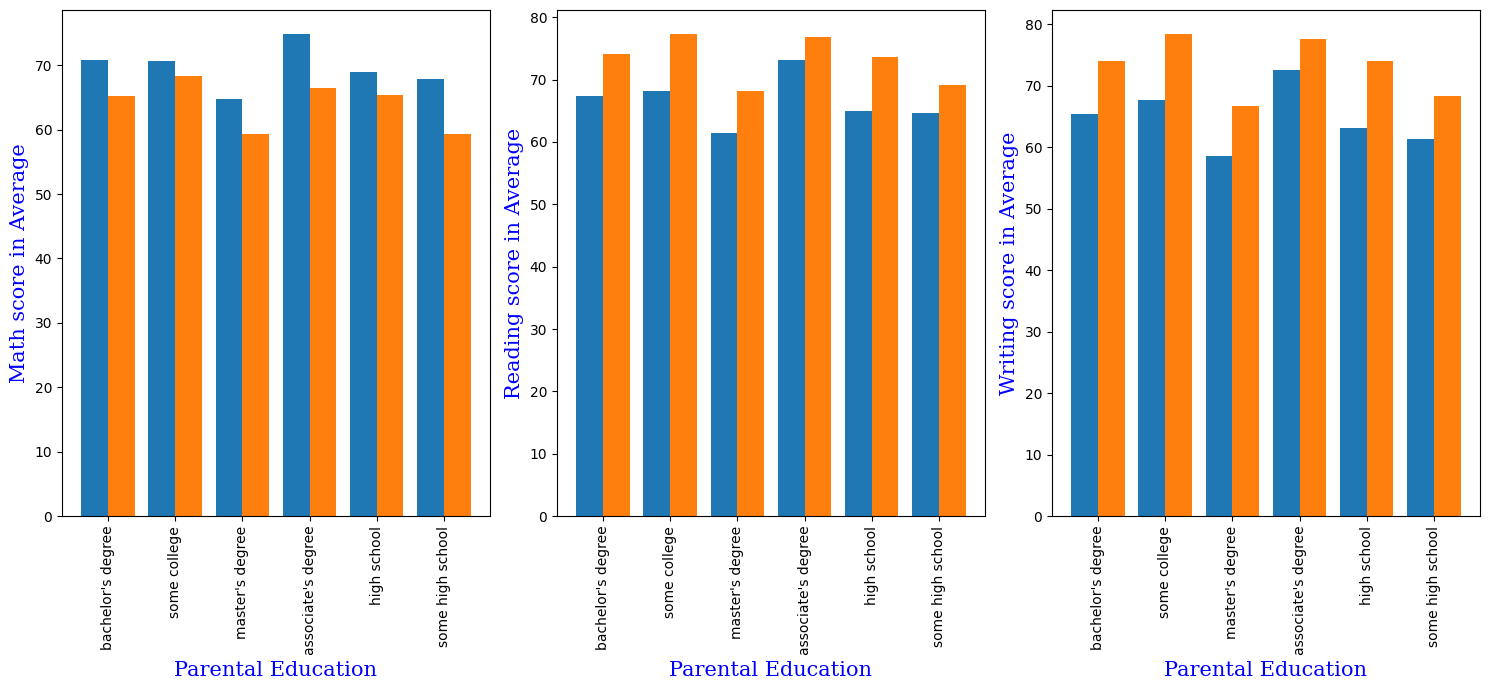

In [ ]:
#Ananlyze parental education and math scores
#Data Visualization
#Male has higher score than female in Math, and female has higher score in reading and writing
font2 = {'family':'serif','color':'blue','size':15}
fig, ax = plt.subplots(figsize=(15,7),facecolor='w')
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
j = 0
for i in ['math score', 'reading score', 'writing score']:
    j += 1
    plt.subplot(1,3,j)
#     plt.figure(figsize=(10,5))
    X_axis = np.arange(len(df['parental_education'].unique()))
    plt.bar(X_axis-0.2, df.groupby(['gender', 'parental_education'])[i].mean()["male"], 0.4, label="male")
    plt.bar(X_axis+0.2, df.groupby(['gender', 'parental_education'])[i].mean()["female"], 0.4, label="female")
    plt.xticks(X_axis, df["parental_education"].unique())
    plt.xlabel("Parental Education", fontdict = font2)
    plt.ylabel(f"{i.capitalize()} in Average", fontdict = font2)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#check male and female performance in all subjects
df.groupby(['gender'])[df.columns[-3:]].agg(['min','median','max'])

math score             reading score             writing score         \
              min median  max           min median  max           min median   
gender                                                                         
female          0   65.0  100            17   73.0  100            10   74.0   
male           27   69.0  100            23   66.0  100            15   64.0   

             
        max  
gender       
female  100  
male    100

<ipython-input-21-571df46d49e8>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3, idx+1)


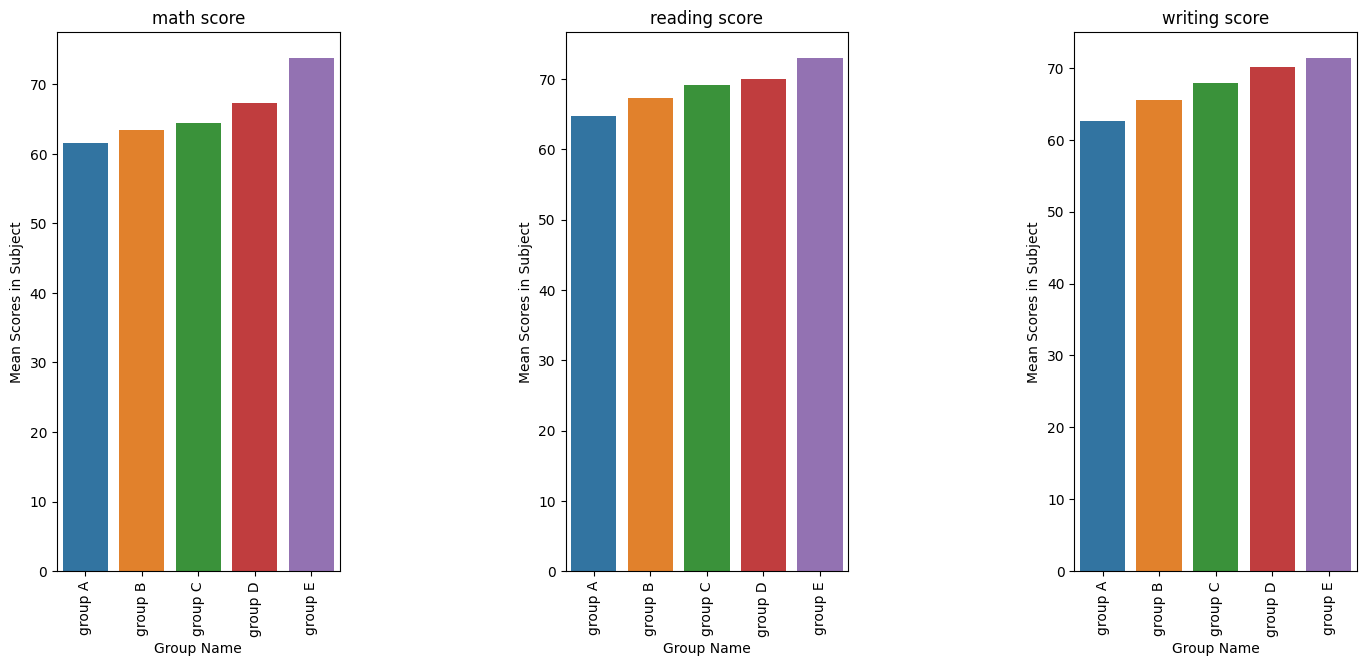

In [ ]:
#group E has highest score in all subjects
fig, ax = plt.subplots(figsize=(10,7))
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    ethn_df = df.groupby("ethnicity")[list(df.columns[-3:])[idx]].mean()
    sns.barplot(x=ethn_df.index, y = ethn_df.values)
    plt.xlabel("Group Name")
    plt.ylabel("Mean Scores in Subject")
    plt.xticks(rotation=90)
    plt.title(list(df.columns[-3:])[idx])
plt.show()

In [ ]:
#check effects of lunch on students performance
df.groupby(["lunch", "gender"])[df.columns[-3:]].mean()

math score  reading score  writing score
lunch        gender                                          
free/reduced female   55.814815      67.386243      66.444444
             male     62.457831      61.542169      59.126506
standard     female   68.124620      75.607903      75.927052
             male     72.022152      67.537975      65.509494

In [ ]:
#check effects of test preparation course on students performance
df.groupby(["test preparation course", "gender"])[df.columns[-3:]].mean()

math score  reading score  writing score
test preparation course gender                                          
completed               female   67.195652      77.375000      78.793478
                        male     72.339080      70.212644      69.793103
none                    female   61.670659      69.982036      68.982036
                        male     66.688312      62.795455      59.649351

<ipython-input-25-e20248655846>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3, idx+1)
<ipython-input-25-e20248655846>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[list(df.columns[-3:])[idx]], kde=True)
<ipython-input-25-e20248655846>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide

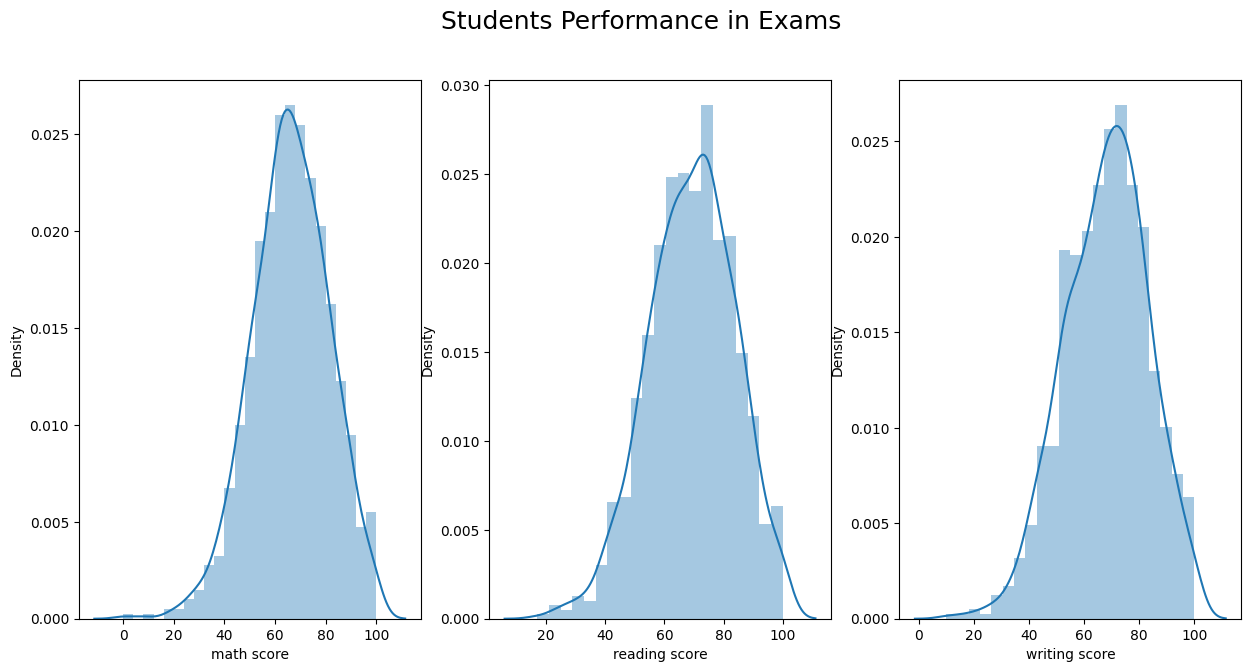

In [ ]:
plt.subplots(figsize=(15,7))

for idx in range(3):
    plt.subplot(1,3, idx+1)
    sns.distplot(df[list(df.columns[-3:])[idx]], kde=True)

plt.suptitle('Students Performance in Exams', fontsize = 18)
plt.show()

In [ ]:
import math
stdevm = df['math score'].std()
print("standard deviation of math score is",stdevm)
stdevr = df['reading score'].std()
print("standard deviation of reading score is",stdevr)
stdevw = df['writing score'].std()
print("standard deviation of writing score is",stdevw)

standard deviation of math score is 15.16308009600945
standard deviation of reading score is 14.600191937252216
standard deviation of writing score is 15.19565701086965


<ipython-input-27-96036a9792ac>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3, i+1)


math score_avg
66.089
49.0
reading score_avg
69.169
51.0
writing score_avg
68.054
51.0


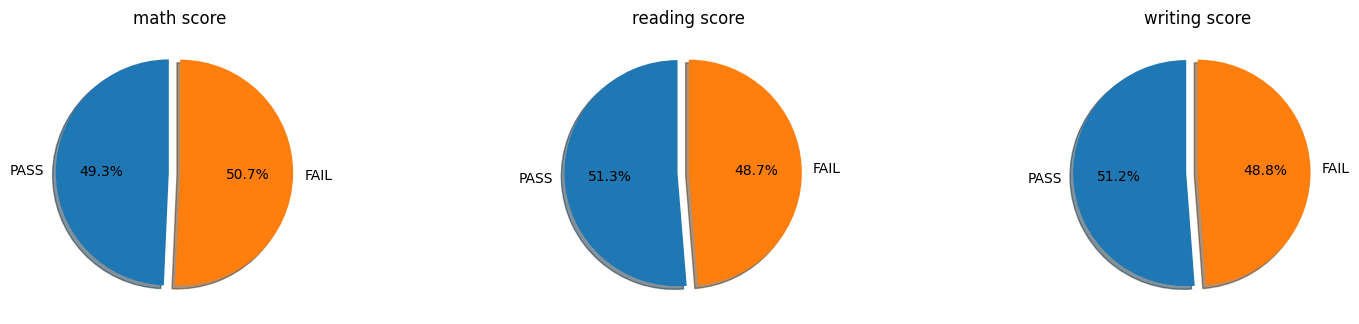

In [ ]:
#how many people pass the exam in all subjects PASS >= mean value of score
fig, ax = plt.subplots(figsize=(10,7))
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for i in range(3):
    plt.subplot(1,3, i+1)
    temp_name = str(df.columns[-3:][i])+"_avg"
    temp_val = temp_name
    print(temp_name)
    temp_val = df[df.columns[-3:][i]].mean()
    print(temp_val)
    pass_cnt = df[df[df.columns[-3:][i]] > temp_val].shape[0]
    pass_cnt_rate = round(pass_cnt/df.shape[0], 2)*100
    print(pass_cnt_rate)
    plt.title(str(df.columns[-3:][i]))
    plt.pie([pass_cnt,df.shape[0]-pass_cnt] , explode = (0.1, 0.0), labels=["PASS", "FAIL"], autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()